In [18]:
import numpy as np
np.random.seed(5)

import matplotlib.pyplot as plt

import pandas as pd
import datetime


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

In [19]:
def generate_time_serie(n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, 1)
    time = np.linspace(0, 1, n_steps)
    serie = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    serie += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    serie += 0.1 * (np.random.rand(n_steps) - 0.5)   # + noise
    return serie.astype(np.float32)

In [20]:
def plot_serie(serie, lg_sec, y, y_pred ):
  fig=plt.figure(figsize=(15,5))
  plt.plot(serie)
  plt.plot(lg_sec, y, "bo")
  plt.plot(lg_sec, y_pred, "rx")

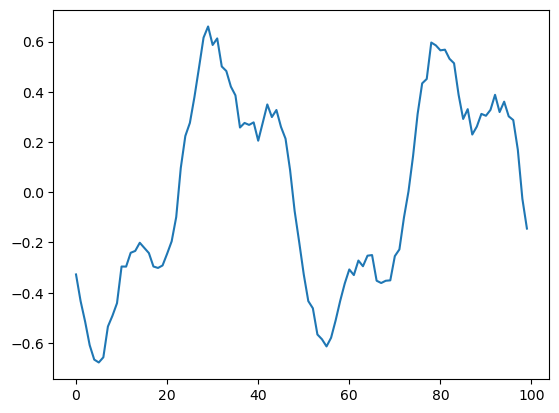

In [21]:
n_steps = 100
s1 = generate_time_serie(n_steps)
plt.plot(s1)

In [22]:
def genera_train(serie, lg_secuencia, lg_y):
  x=[]
  y=[]
  ultimo = len(serie)-lg_secuencia-lg_y
  for ix in range(ultimo):
    x.append(serie[ix:ix+lg_secuencia])
    y.append(serie[ix+lg_secuencia:ix+lg_secuencia+lg_y])
  return np.array(x), np.array(y)

In [23]:
lg_sec = 50
x, y = genera_train(s1, lg_sec, 1)
limite = int(len(x) * 0.8)
X_train, y_train = x[:limite], y[:limite]
X_test, y_test = x[limite:], y[limite:]


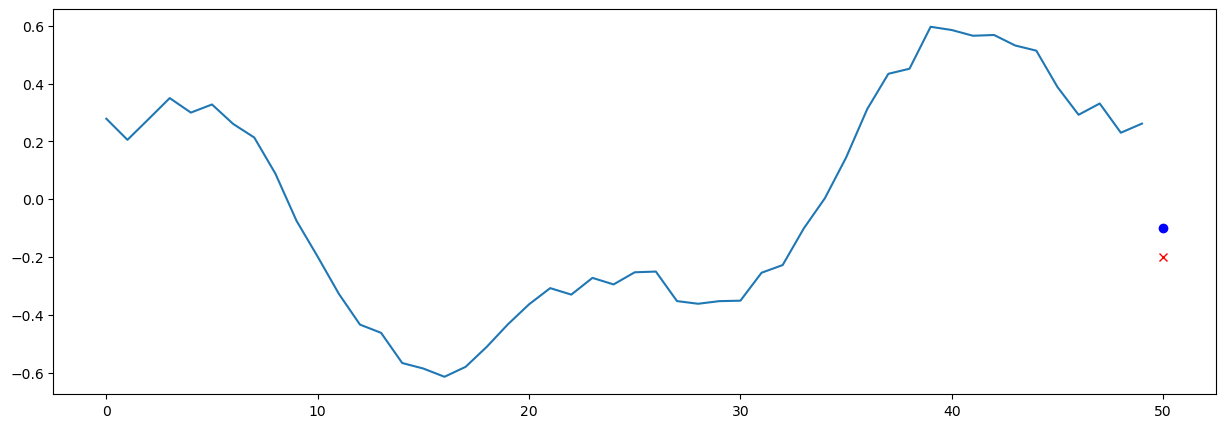

In [24]:
plot_serie(X_test[0], lg_sec, -0.1, -0.2)

In [25]:
def modelo_predice_igual_ultimo(x):
  ret = []
  for e in x:
    ret.append(e[-1])
  return ret

def modelo_regresion_lineal(x):
  ret = []
  for e in x:
    regresor = LinearRegression()
    vx = [[i] for i in range(len(e))]
    vy = [[e[i]] for i in range(len(e))]

    regresor.fit(vx, vy)
    r1 = regresor.predict([[len(e)]])
    ret.append(r1)
  ret = np.concatenate(ret)
  return ret

def modelo_red_densa(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.Input(shape=(lg_sec,)),
      keras.layers.Dense(30, activation="relu"),
      keras.layers.Dense(30, activation="relu"),
      keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=100)
  return model

def modelo_red_recurrente_1(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.SimpleRNN(1, return_sequences=False, input_shape=[None, 1])
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=100)
  return model

def modelo_red_recurrente_2(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.SimpleRNN(100, return_sequences=False, input_shape=[None, 1]),
      keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=50)
  return model

def modelo_red_recurrente_3(x_train, y_train):
  model = keras.models.Sequential([
      keras.layers.SimpleRNN(50, return_sequences=True, input_shape=[None, 1]),
      keras.layers.SimpleRNN(50, return_sequences=False),
      keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer="adam")
  model.fit(x_train, y_train, epochs=50)
  return model


rms modelo_predice_igual_ultimo = 0.08301575481891632


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


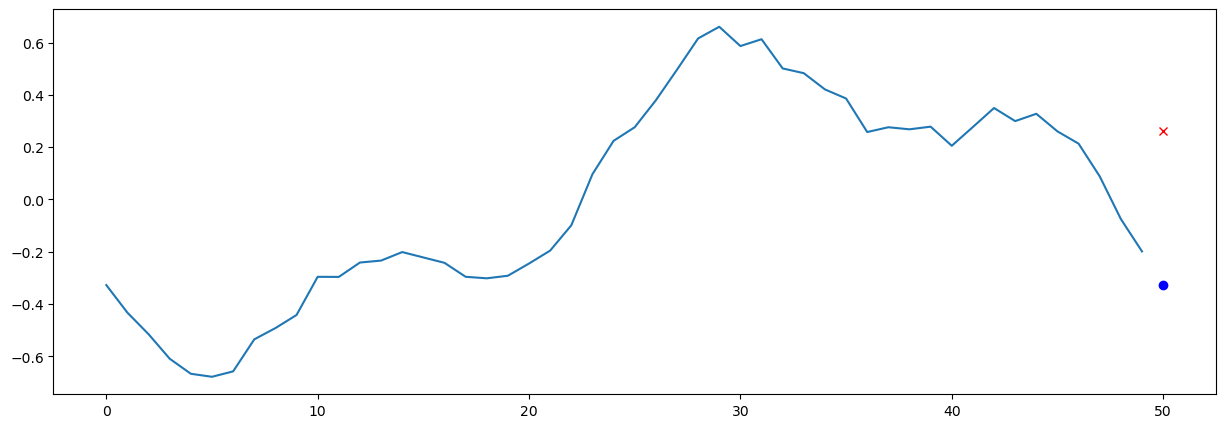

In [26]:
y_pred = modelo_predice_igual_ultimo(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_predice_igual_ultimo = {rms}")
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


rms modelo_regresion_lineal = 0.2396608149103229


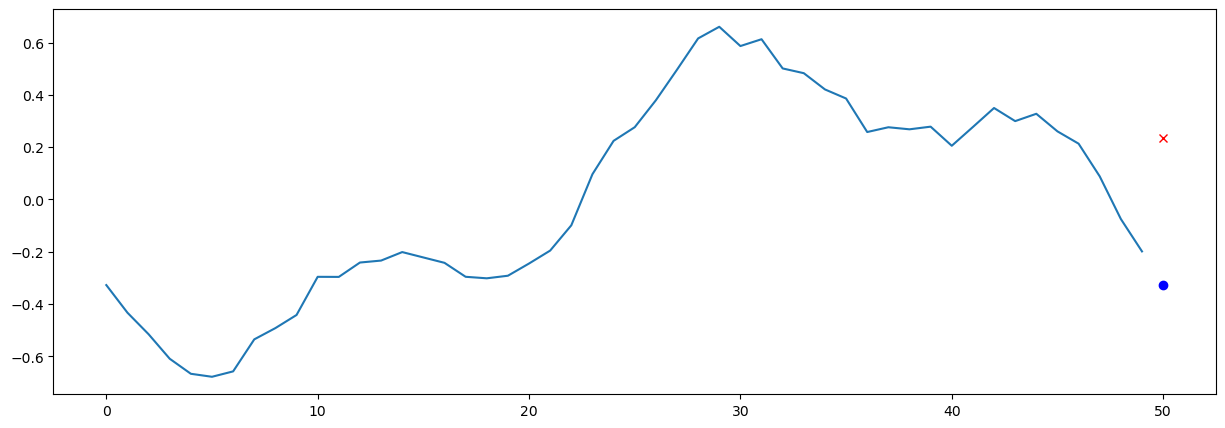

In [27]:
y_pred = modelo_regresion_lineal(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_regresion_lineal = {rms}")
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1751  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1241 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0922 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0667 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0478 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0343 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 
Epoch 16/100
2/2 ━

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


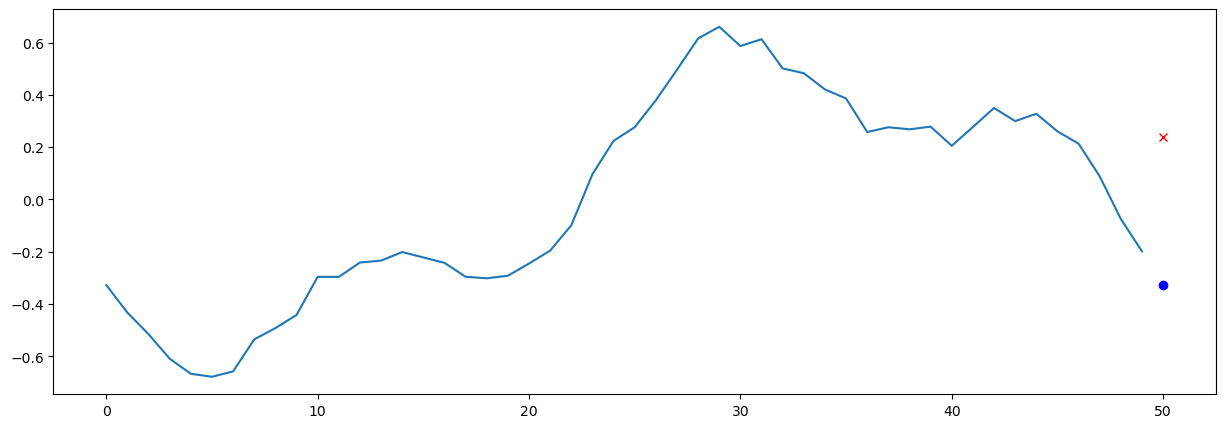

In [28]:
modelo = modelo_red_densa(X_train, y_train)
y_pred = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_red_densa = {rms}")
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1646  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1653 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1631 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1562 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1533 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1589 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1523 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1530 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1511 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1502 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1472 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1472 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1504 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1496 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1482 
Epoch 16/100
2/2 ━

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


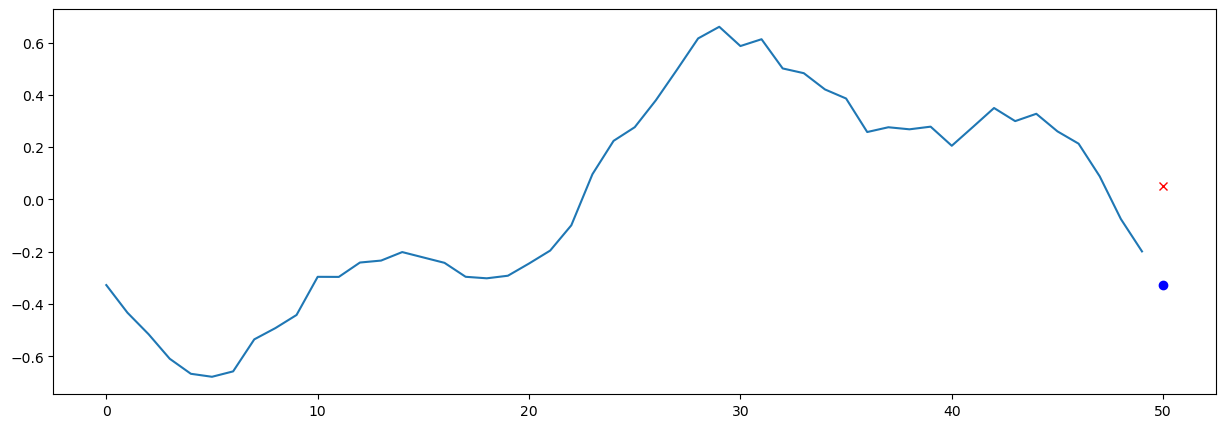

In [29]:
modelo = modelo_red_recurrente_1(X_train, y_train)
y_pred = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_red_recurrente_1 = {rms}")
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0812
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0484 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0298 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0053 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0031
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


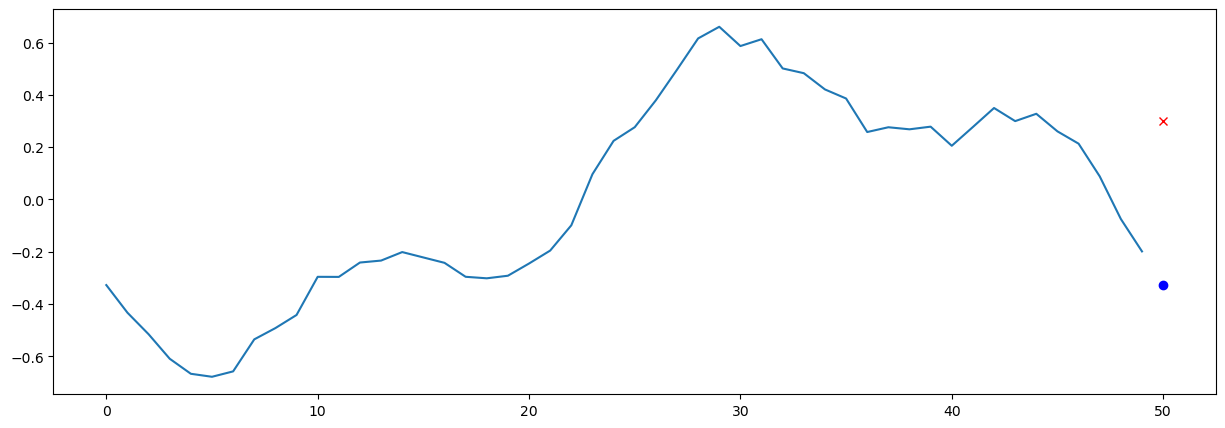

In [30]:
modelo = modelo_red_recurrente_2(X_train, y_train)
y_pred = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_red_recurrente_2 = {rms}")
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4746
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1270
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0349
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0218
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0149
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0051
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0079
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0065
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0044
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0042
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0043
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0029
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


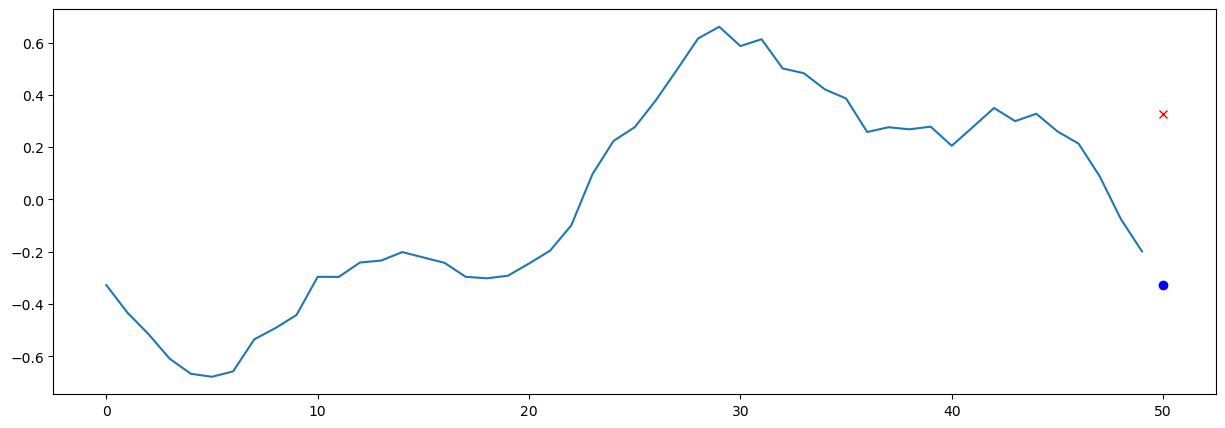

In [31]:
modelo = modelo_red_recurrente_3(X_train, y_train)
y_pred = modelo.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms modelo_red_recurrente_3 = {rms}")
plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

In [32]:
# se pueden predecir 10 valores cambiando el valor de lg_y a 10
lg_y = 10
rnn_predice_10 = keras.models.Sequential([
    keras.layers.SimpleRNN(40, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(40),
    keras.layers.Dense(lg_y)
    ])
rnn_predice_10.compile(loss="mse", optimizer="adam")


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
lg_y = 10

x, y = genera_train(s1, lg_sec,  lg_y)
lim = int((len(x) * 0.8))
X_train, y_train = x[:lim], y[:lim]
X_test, y_test = x[lim:], y[lim:]


In [34]:
rnn_predice_10.fit(X_train, y_train, epochs=60)

Epoch 1/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.3069
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1714
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1104
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0970
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0915
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0823
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0695
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0564
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0469
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0417
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0382
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0360
Epoch 13/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0341
Epoch 14/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0314
Epoch 15/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0290
Epoch 16/60
1/1 ━━━━━━━━━━━━━━━━━━━━

In [35]:
y_pred = rnn_predice_10.predict(X_test)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms rnn_predice_10 = {rms}")
#plot_serie(X_train[0], lg_sec, y_train[0], y_pred[0] )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
rms rnn_predice_10 = 0.10792408138513565


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
# por cada valor que proporcione, me devulve 10
lg_y = 10
lg_sec = 1
x, y = genera_train(s1, lg_sec,  lg_y)
lim = int((len(x) * 0.8))
X_train, y_train = x[:lim], y[:lim]
X_test, y_test = x[lim:], y[lim:]

rnn_predice_1_10 = keras.models.Sequential([
    keras.layers.SimpleRNN(40, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(40, return_sequences=True),
    keras.layers.Dense(lg_y)
    ])
rnn_predice_1_10.compile(loss="mse", optimizer="adam")
rnn_predice_1_10.fit(X_train, y_train, epochs=100)

c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1576
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1472 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1460 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1415 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1409 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1371 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1363 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1337 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1325 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1388 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1346 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1362 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1326 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1369 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1354 
Epoch 16/100
3/3 ━━━

In [37]:
y_pred = rnn_predice_10.predict(X_test)
y_pred = y_pred.reshape(y_pred.shape[0], -1)
rms = mean_squared_error(y_test, y_pred, squared=False)
print(f"rms rnn_predice_10 = {rms}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
rms rnn_predice_10 = 0.3575264513492584


c:\Users\nicol\miniconda3\envs\ia\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
